In [1]:
!pip install opencv-python scikit-learn matplotlib seaborn


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os

dataset_path = "/content/drive/MyDrive/dataset"

# Cek apakah folder ada dan isinya
if os.path.exists(dataset_path):
    print(" Folder 'dataset' ditemukan.")
    print(" Isi folder 'dataset':", os.listdir(dataset_path))
else:
    print(" Folder 'dataset' TIDAK ditemukan.")


 Folder 'dataset' ditemukan.
 Isi folder 'dataset': ['Organic']


 Folder '/content/drive/MyDrive/dataset/Recyclable' tidak ditemukan!

 Akurasi model k-NN (k=3): 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


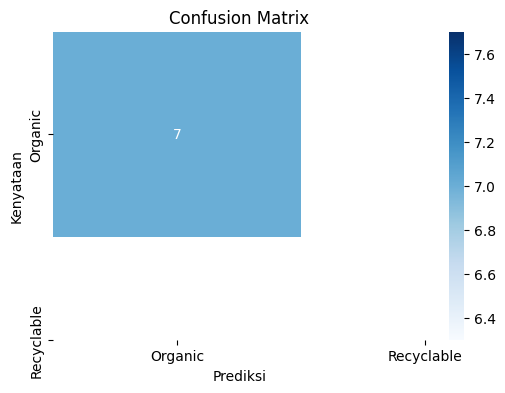

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Path dataset
DATASET_DIR = "/content/drive/MyDrive/dataset"
CATEGORIES = ['Organic', 'Recyclable']
IMG_SIZE = 100

# Fungsi ekstraksi fitur: histogram warna
def extract_color_histogram(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

data = []
labels = []

# Baca gambar dan ambil fiturnya
for label, category in enumerate(CATEGORIES):
    folder = os.path.join(DATASET_DIR, category)
    if not os.path.exists(folder):
        print(f" Folder '{folder}' tidak ditemukan!")
        continue
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        image = cv2.imread(file_path)
        if image is None:
            continue
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        features = extract_color_histogram(image)
        data.append(features)
        labels.append(label)

# Konversi ke array
X = np.array(data)
y = np.array(labels)

# Cek data sebelum training
if len(X) == 0:
    print(" Data kosong! Cek apakah gambar sudah di-upload ke folder yang benar.")
else:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Buat model dan latih
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Akurasi model k-NN (k=3): {acc:.2f}")

    # Tampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=CATEGORIES, yticklabels=CATEGORIES)
    plt.xlabel('Prediksi')
    plt.ylabel('Kenyataan')
    plt.title('Confusion Matrix')
    plt.show()
